# Intro to regression with Neutal Netowkrs in Tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.2


## Creating some data to view and fit

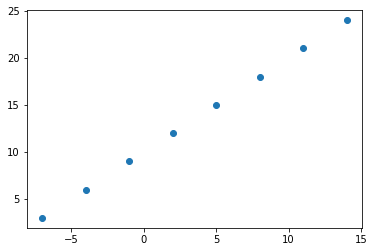

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shapes

In [5]:
# Create a demo tensorr for out housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [7]:
X[0], y[0]

(-7.0, 3.0)

In [8]:
X[1], y[1]

(-4.0, 6.0)

In [9]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

# Steps in Modeling with TensorFlow
1. Creating a model - define the input and output layters, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells out model how wrong it is) and the optimizer (tells our model how to improve the patters its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find pattersn between X and y (features and labels)

To fix issue model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Steps in modeling with TensorFlow
1. Get data ready (Turn into tensors)
2. Build or pick a pretrained model (to suit your problem)
3. Fit the model to the data and make a prediciton
4. evaluate the model
5. improve through experimentation
6. save and reload your trained model

In [10]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=10)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/10
1/1 [==============================] - 0s 17ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/10
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/10
1/1 [==============================] - 0s 13ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/10
1/1 [==============================] - 0s 12ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/10
1/1 [==============================] - 0s 13ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/10
1/1 [==============================] - 0s 11ms/step - loss: 10.3123 - mae: 10.3123


In [11]:
# Checkout X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
# Try and make a prediction using out data
model.predict([17.0])

1/1 [==============================] - 0s 154ms/step


array([[15.741023]], dtype=float32)

# Improving our model

We can improve out model, by aletering the steps we took to create a model.

1. Creating a model - here we might add more layers, increate the number of hidden units (all called neurrons) winith each of the hidden layers, change the activation function of each layer.
2. Compiling a model - here we might change the optimization function or perhaps the learning rate of the optimization function
3. Fitting a model - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from)

In [13]:
### Improving the model (Creating more hidden layers only)

# 1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 623ms/step - loss: 14.3099 - mae: 14.3099
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 13.8705 - mae: 13.8705
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 13.4605 - mae: 13.4605
Epoch 4/10
1/1 [==============================] - 0s 7ms/step - loss: 13.0821 - mae: 13.0821
Epoch 5/10
1/1 [==============================] - 0s 11ms/step - loss: 12.7203 - mae: 12.7203
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 12.3467 - mae: 12.3467
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 11.9567 - mae: 11.9567
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 11.5246 - mae: 11.5246
Epoch 9/10
1/1 [==============================] - 0s 18ms/step - loss: 11.0368 - mae: 11.0368
Epoch 10/10
1/1 [==============================] - 0s 10ms/step - loss: 10.4346 - mae: 10.4346


In [14]:
### Improving the Model (Adjusting Optimizer only) ## Really slow imporovements but would pair well with more layers

# 1. Create a Model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 626ms/step - loss: 7.9432 - mae: 7.9432
Epoch 2/10
1/1 [==============================] - 0s 10ms/step - loss: 7.9427 - mae: 7.9427
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 7.9423 - mae: 7.9423
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 7.9418 - mae: 7.9418
Epoch 5/10
1/1 [==============================] - 0s 10ms/step - loss: 7.9414 - mae: 7.9414
Epoch 6/10
1/1 [==============================] - 0s 9ms/step - loss: 7.9409 - mae: 7.9409
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 7.9405 - mae: 7.9405
Epoch 8/10
1/1 [==============================] - 0s 8ms/step - loss: 7.9400 - mae: 7.9400
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 7.9396 - mae: 7.9396
Epoch 10/10
1/1 [==============================] - 0s 7ms/step - loss: 7.9391 - mae: 7.9391


In [15]:
### Improving a model (All from above added)
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 689ms/step - loss: 13.2296 - mae: 13.2296
Epoch 2/10
1/1 [==============================] - 0s 10ms/step - loss: 13.1890 - mae: 13.1890
Epoch 3/10
1/1 [==============================] - 0s 11ms/step - loss: 13.1483 - mae: 13.1483
Epoch 4/10
1/1 [==============================] - 0s 8ms/step - loss: 13.1076 - mae: 13.1076
Epoch 5/10
1/1 [==============================] - 0s 9ms/step - loss: 13.0670 - mae: 13.0670
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 13.0263 - mae: 13.0263
Epoch 7/10
1/1 [==============================] - 0s 16ms/step - loss: 12.9856 - mae: 12.9856
Epoch 8/10
1/1 [==============================] - 0s 16ms/step - loss: 12.9448 - mae: 12.9448
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 12.9039 - mae: 12.9039
Epoch 10/10
1/1 [==============================] - 0s 24ms/step - loss: 12.8633 - mae: 12.8633


In [16]:
model.predict([36.0])

1/1 [==============================] - 0s 176ms/step


array([[3.5413983]], dtype=float32)

In [17]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
model.predict([34.0])

1/1 [==============================] - 0s 100ms/step


array([[3.345435]], dtype=float32)

In [19]:
### Improving a model (All from above added)
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 588ms/step - loss: 13.5566 - mae: 13.5566
Epoch 2/10
1/1 [==============================] - 0s 9ms/step - loss: 13.5251 - mae: 13.5251
Epoch 3/10
1/1 [==============================] - 0s 10ms/step - loss: 13.4937 - mae: 13.4937
Epoch 4/10
1/1 [==============================] - 0s 7ms/step - loss: 13.4625 - mae: 13.4625
Epoch 5/10
1/1 [==============================] - 0s 8ms/step - loss: 13.4317 - mae: 13.4317
Epoch 6/10
1/1 [==============================] - 0s 9ms/step - loss: 13.4009 - mae: 13.4009
Epoch 7/10
1/1 [==============================] - 0s 10ms/step - loss: 13.3702 - mae: 13.3702
Epoch 8/10
1/1 [==============================] - 0s 9ms/step - loss: 13.3400 - mae: 13.3400
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 13.3102 - mae: 13.3102
Epoch 10/10
1/1 [==============================] - 0s 7ms/step - loss: 13.2813 - mae: 13.2813


In [20]:
model.predict([34.0])

1/1 [==============================] - 0s 57ms/step


array([[1.0333917]], dtype=float32)

# Common Ways to improve a model
1. Adding layers
2. Increate the number of hidden units
3. Change the activation functions
4. Change the optimization function
5. Change the learning rate (Most important parameter)
6. Fitting on more data
7. Fitting for longer (epochs)

# Evaluating a model


In [21]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

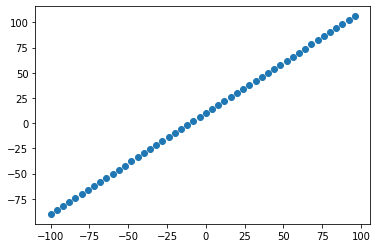

In [23]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

In [24]:
### Improving a model (All from above added)
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=10)

Epoch 1/10
2/2 [==============================] - 0s 8ms/step - loss: 50.5018 - mae: 50.5018
Epoch 2/10
2/2 [==============================] - 0s 6ms/step - loss: 50.0301 - mae: 50.0301
Epoch 3/10
2/2 [==============================] - 0s 6ms/step - loss: 49.6294 - mae: 49.6294
Epoch 4/10
2/2 [==============================] - 0s 8ms/step - loss: 49.2057 - mae: 49.2057
Epoch 5/10
2/2 [==============================] - 0s 6ms/step - loss: 48.7846 - mae: 48.7846
Epoch 6/10
2/2 [==============================] - 0s 5ms/step - loss: 48.3693 - mae: 48.3693
Epoch 7/10
2/2 [==============================] - 0s 6ms/step - loss: 47.9417 - mae: 47.9417
Epoch 8/10
2/2 [==============================] - 0s 9ms/step - loss: 47.5332 - mae: 47.5332
Epoch 9/10
2/2 [==============================] - 0s 6ms/step - loss: 47.1575 - mae: 47.1575
Epoch 10/10
2/2 [==============================] - 0s 5ms/step - loss: 46.7295 - mae: 46.7295


In [25]:
model.predict([100.])

1/1 [==============================] - 0s 67ms/step


array([[12.752175]], dtype=float32)

# Splitting data in 3 sets
1. Training set 70-80%, the model learns from this data
2. Validattion set - the model gets tuned on this data, which is typically 10-15% of the data available
3. Test set -  the model gets evaluated on this data to test what it has learned, this is typically 10-15% of the data available.


In [26]:
len(X)

50

In [27]:
# Training Set
X_train = X[:40] # First 40 of X (80%)
y_train = y[:40]

X_test = X[40:] # Last 10 of X (20%)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

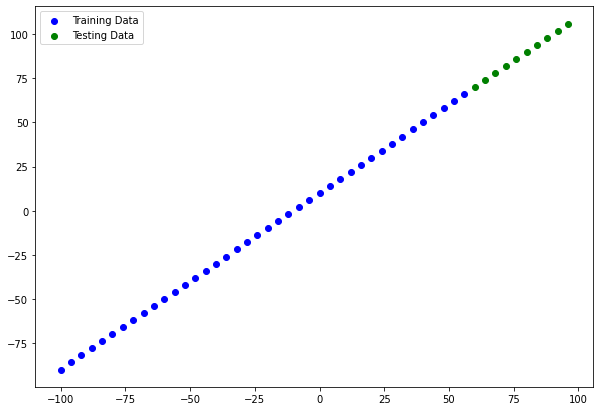

In [28]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training Data")
plt.scatter(X_test, y_test, c="g", label="Testing Data")
plt.legend();

In [29]:
# 1. Create the Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 38.3055 - mae: 38.3055
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 16.5003 - mae: 16.5003
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2429 - mae: 11.2429
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 8.6414 - mae: 8.6414
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 6.6461 - mae: 6.6461
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 6.5787 - mae: 6.5787
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 7.8277 - mae: 7.8277
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.6245 - mae: 9.6245
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 7.1668 - mae: 7.1668
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 7.8081 - mae: 7.8081
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - loss: 

In [30]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 50)                100       
                                                                 
 dense_19 (Dense)            (None, 50)                2550      
                                                                 
 dense_20 (Dense)            (None, 50)                2550      
                                                                 
 dense_21 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5,251
Trainable params: 5,251
Non-trainable params: 0
_________________________________________________________________


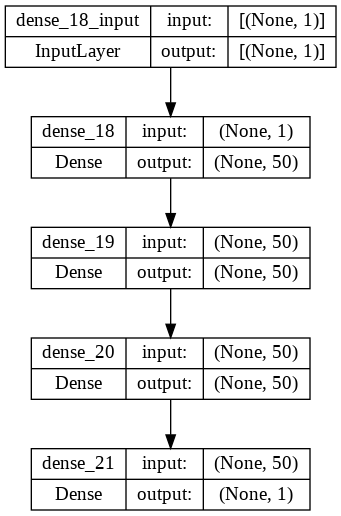

In [31]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [32]:
y_pred = model.predict(X_test)
y_pred = tf.squeeze(y_pred)
y_pred

1/1 [==============================] - 0s 57ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.644615,  74.7397  ,  78.834785,  82.92986 ,  87.02495 ,
        91.12003 ,  95.21511 ,  99.3102  , 103.40528 , 107.500374],
      dtype=float32)>

In [33]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [34]:
X[40:], y[40:]

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [35]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", label="Training Data")
  plt.scatter(test_data, test_labels, c="g", label="Test Data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend()


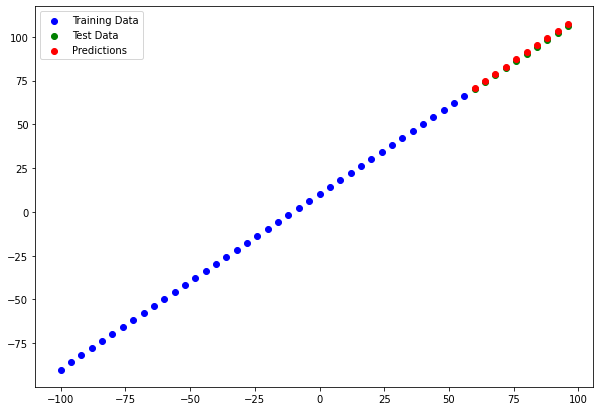

In [36]:
plot_predictions()

In [37]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 146ms/step - loss: 1.0725 - mae: 1.0725


[1.0724914073944092, 1.0724914073944092]

In [38]:
tf.metrics.mean_absolute_error(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0724914>

In [39]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.644615,  74.7397  ,  78.834785,  82.92986 ,  87.02495 ,
        91.12003 ,  95.21511 ,  99.3102  , 103.40528 , 107.500374],
      dtype=float32)>

In [40]:
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.0724914>

In [41]:
mse = tf.metrics.mean_squared_error(y_test, y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1.2248255>

In [42]:
# Make some function to reuse MAE and MSE
def mae(y_test, y_pred):
  return tf.metrics.mean_absolute_error(y_test, y_pred)

def mse(y_test, y_pred):
  return tf.metrics.mean_squared_error(y_test, y_pred)

# Saving our models

In [43]:
model.save("best_result_model")

In [44]:
model.save("hdf5_best_result_model.h5")

# Load in a saved model

In [45]:
loaded_SavedModel_format = tf.keras.models.load_model("best_result_model")
loaded_SavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 50)                100       
                                                                 
 dense_19 (Dense)            (None, 50)                2550      
                                                                 
 dense_20 (Dense)            (None, 50)                2550      
                                                                 
 dense_21 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5,251
Trainable params: 5,251
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Inport required Libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Reas in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [50]:
# One-Hot Encoding out data
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [55]:
# Create X & y values (Features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [57]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [58]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )
len(X), len(X_train), len(X_test)
len(y), len(y_train), len(y_test)

(1338, 1070, 268)

In [61]:
# Build a neutal network
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 6ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.3945 - mae: 7595.3945
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7698.5586 - mae: 7698.5586
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7496.7773 - mae: 7496.7773
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7493.1738 - mae: 7493.1738

In [62]:
# Check the results
insurance_model.evaluate(X_test, y_test)


9/9 [==============================] - 0s 4ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [79]:
# Imporving the first model
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(lr=0.001),
                          metrics=["mae"])

# 3. Fit the model.
history = insurance_model_2.fit(X_train, y_train, epochs=300, verbose=1)

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


34/34 [==============================] - 0s 3ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/300
34/34 [==============================] - 0s 3ms/step - loss: 13104.4287 - mae: 13104.4287
Epoch 3/300
34/34 [==============================] - 0s 3ms/step - loss: 12749.5400 - mae: 12749.5400
Epoch 4/300
34/34 [==============================] - 0s 3ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/300
34/34 [==============================] - 0s 3ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/300
34/34 [==============================] - 0s 3ms/step - loss: 9457.7188 - mae: 9457.7188
Epoch 7/300
34/34 [==============================] - 0s 3ms/step - loss: 8147.6533 - mae: 8147.6533
Epoch 8/300
34/34 [==============================] - 0s 2ms/step - loss: 7528.8398 - mae: 7528.8398
Epoch 9/300
34/34 [==============================] - 0s 3ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/300
34/34 [==============================] - 0s 3ms/step - loss: 7409.0811 - mae: 7409.0811
E

In [75]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3245.4158 - mae: 3245.4158


[3245.415771484375, 3245.415771484375]

Text(0.5, 0, 'epochs')

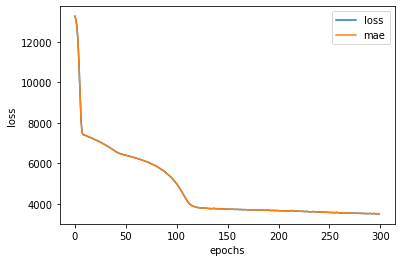

In [81]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# Preprocessing Data (Normalization and Standardization)

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [84]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # Turns all values in these columns to a 0 or 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]) # Converts these columns to a 0 or 1 like above
)

# Create X & y
X = insurance.drop("charges", axis=1)
y= insurance["charges"]

# Make train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data 
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [89]:
# Set seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=130)

Epoch 1/130
34/34 [==============================] - 1s 5ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/130
34/34 [==============================] - 0s 4ms/step - loss: 13333.4795 - mae: 13333.4795
Epoch 3/130
34/34 [==============================] - 0s 4ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/130
34/34 [==============================] - 0s 5ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/130
34/34 [==============================] - 0s 3ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/130
34/34 [==============================] - 0s 3ms/step - loss: 13066.4482 - mae: 13066.4482
Epoch 7/130
34/34 [==============================] - 0s 3ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/130
34/34 [==============================] - 0s 3ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/130
34/34 [==============================] - 0s 3ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/130
34/34 [==============================] - 0s 3ms/step - loss: 11925.96

In [90]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3352.4136 - mae: 3352.4136


[3352.41357421875, 3352.41357421875]